In [1258]:
import h5py
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1259]:
import warnings
warnings.filterwarnings('ignore')

In [1260]:
data = h5py.File('data/Q1/MNIST_Subset.h5','r+')
X=data['X'][:]
Y=data['Y'][:]

In [1261]:
X.shape,Y.shape

((14251, 28, 28), (14251,))

In [1262]:
X = X.reshape(X.shape[0],-1)

In [1263]:
# X=X/255

In [1264]:
np.unique(Y)

array([7, 9], dtype=uint8)

In [1265]:
#as we only have 2 classes
Y = np.where(Y==7,0,1)

In [1266]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [1267]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((11400, 784), (2851, 784), (11400,), (2851,))

In [1268]:
def one_hot_encoding(Y):
    n_classes = len(np.unique(Y))
    Y=Y.reshape(1,Y.shape[0])
    Y_new = np.eye(n_classes)[Y.astype('int32')]
    Y_new = Y_new.T.reshape(n_classes, Y.shape[1])
    return Y_new,n_classes

In [1269]:
Y_train,n_classes = one_hot_encoding(Y_train)
Y_test,n_classes=one_hot_encoding(Y_test)

In [1270]:
Y_train.shape,Y_test.shape

((2, 11400), (2, 2851))

In [1271]:
X_train=X_train.T
X_test=X_test.T

In [1272]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((784, 11400), (784, 2851), (2, 11400), (2, 2851))

In [1273]:
def relu(z,derative = False):
    if derative:
        z[z<=0]=0
        z[z>0]=1
        return z
    z[z<0]=0
    return z

In [1361]:
def sigmoid(z,derative = False):
    if derative:
        print("===================input to sigmoid derv====================")
        print(z)
        print("=======================output of derv sigmoid===========")
        print(z*(1-z))
        print("=====================lets try something==================")
        temp = sigmoid(z)*(1-sigmoid(z))
        print(temp)
#         return z*(1-z)
        return temp
    return 1.0/(1.0+np.exp(-z))

In [1362]:
def softmax(z):
    z=z-np.max(z,axis=0)
    return np.exp(z)/np.sum(np.exp(z),axis=0)

In [1363]:
def compute_multiclass_loss(Y, Y_hat):
    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    return -(1/m) * L_sum

In [1364]:
# def init_weights(n_hidden_layers, number_of_neurons):
#     weights_layers =[np.random.randn(number_of_neurons[0],X_train.shape[0])]
#     bias_layers = [np.zeros((number_of_neurons[0],1))]
    
#     for i in range(1,n_hidden_layers):
#         weights_layers.append(np.random.randn(number_of_neurons[i],weights_layers[i-1].shape[0]))
#         bias_layers.append(np.zeros((number_of_neurons[i],1)))
    
#     weights_layers.append(np.random.uniform(size=(n_classes,weights_layers[-1].shape[0])))
#     bias_layers.append(np.random.uniform(size=(n_classes,1)))
    
#     return weights_layers,bias_layers

In [1365]:
def init_weights(n_hidden_layers, number_of_neurons):
    weights_layers =[np.random.uniform(size=(number_of_neurons[0],X_train.shape[0]))]
    bias_layers = [np.random.uniform(size=(number_of_neurons[0],1))]
    
    for i in range(1,n_hidden_layers):
        weights_layers.append(np.random.uniform(size=(number_of_neurons[i],weights_layers[i-1].shape[0])))
        bias_layers.append(np.random.uniform(size=(number_of_neurons[i],1)))
    
    weights_layers.append(np.random.uniform(size=(n_classes,weights_layers[-1].shape[0])))
    bias_layers.append(np.random.uniform(size=(n_classes,1)))
    
    return weights_layers,bias_layers

In [1366]:
def train_neural_network(X_train,Y_train,epoch,learning_rate,hidden_layer_activation=sigmoid):
    global weight_layers
    global bias_layers
    
    cost=[]
    number_of_samples = X_train.shape[1]

    
    #------epoch start here----------
    while epoch>0:
        print("################EPOCH start here ############")
        input_layers = [X_train]
        output_layers=[X_train]

        delta_weights = []
        delta_bias = []


        for weight,bias in zip(weight_layers[:-1],bias_layers[:-1]):
            print("%%%%%%%%%%%%%Hidden layer%%%%%%%%%%%%%%")
            print("=========A in W.A+B=============")
            print(output_layers[-1])
            print("=========W in W.A+B=============")
            print(weight)
            print("=========B in W.A+B=============")
            print(bias)
            input_layers.append(np.dot(weight,output_layers[-1])+bias)
            print('==============input to the layer==============')
            print(input_layers[-1])
            output_layers.append(hidden_layer_activation(input_layers[-1]))
            print("============output after activation===========")
            print(output_layers[-1])

        print('%%%%%%%%%%%%%%%%output layer%%%%%%%%%%%%%')
        print("=========A in W.A+B=============")
        print(output_layers[-1])
        print("=========W in W.A+B=============")
        print(weight_layers[-1])
        print("=========B in W.A+B=============")
        print(bias_layers[-1])
        input_layers.append(np.dot(weight_layers[-1],output_layers[-1])+bias_layers[-1])
        print('==============input to the layer==============')
        print(input_layers[-1])
        output_layers.append(softmax(input_layers[-1]))
        print("============output after activation===========")
        print(output_layers[-1])
        
        
        c=compute_multiclass_loss(Y_train,output_layers[-1])
        print(f"cost = {c}")
        if np.isnan(c):
            print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
        cost.append(c)
        

        #------Output layer error --------
        error = output_layers[-1] - Y_train
        print("================output layer error==========")
        print(error)
        
        
        delta_weights.append((1./number_of_samples)*np.dot(error,output_layers[-2].T))
        print("=====delta weight output layer============")
        print(delta_weights[0])
        
        delta_bias.append((1./number_of_samples)*np.sum(error, axis=1, keepdims=True))
        print("=====delta bias output layer============")
        print(delta_bias[0])
        
        #-----hidden layer stuff

        for i in range(len(input_layers)-1)[:0:-1]:
            error = np.dot(weight_layers[i].T,error)
            print("==============error this layer========")
            print(error)
            delta_z = error*hidden_layer_activation(input_layers[i],derative=True)
            print("==========input layer derv==========")
            print(hidden_layer_activation(input_layers[i],derative=True))
            print("=======delta z===========")
            print(delta_z)
            delta_weights.insert(0,(1./number_of_samples)*np.dot(delta_z,output_layers[i-1].T))
            print("=====delta weight layer============")
            print(delta_weights[0])
            delta_bias.insert(0,(1./number_of_samples)*np.sum(error,axis=1,keepdims=True))
            print("=====delta bias layer============")
            print(delta_bias[0])

        for i in range(len(weight_layers)):
#             delta_weights[i][np.isnan(delta_weights[i])] = 0.0
            weight_layers[i]=weight_layers[i]-learning_rate*delta_weights[i]
            bias_layers[i]=bias_layers[i]-learning_rate*delta_bias[i]
        if np.isnan(c):
            assert(False)
        epoch-=1

    return cost

In [1372]:
#hyperparameters
epoch = 30
learning_rate = 0.01

In [1373]:
weight_layers,bias_layers = init_weights(2,[100,50])
# cost = train_neural_network(X_train,Y_train,epoch,learning_rate,hidden_layer_activation=relu)
cost = train_neural_network(X_train,Y_train,epoch,learning_rate)

################EPOCH start here ############
%%%%%%%%%%%%%Hidden layer%%%%%%%%%%%%%%
=========A in W.A+B=============
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
=========W in W.A+B=============
[[0.70690015 0.62301863 0.82823426 ... 0.01195936 0.44707817 0.64293186]
 [0.77824888 0.98475622 0.21026571 ... 0.74194093 0.16773588 0.61632404]
 [0.36797423 0.88332767 0.62365957 ... 0.61071359 0.31115698 0.55514222]
 ...
 [0.88164753 0.73880717 0.23824801 ... 0.69611091 0.12685595 0.66685541]
 [0.75421307 0.59473532 0.97046455 ... 0.44674073 0.54183283 0.53335763]
 [0.01040147 0.11046254 0.18801841 ... 0.85859102 0.96139344 0.65491608]]
=========B in W.A+B=============
[[0.72092115]
 [0.07783911]
 [0.32617393]
 [0.07046252]
 [0.36239064]
 [0.28435092]
 [0.42671651]
 [0.17429149]
 [0.14082795]
 [0.65070978]
 [0.66417444]
 [0.10003112]
 [0.51059207]
 [0.38410472]
 [0.09577794]
 [0.0473121 ]
 [0.10125811]
 [0.38268875]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
==========input layer derv==========
===================input to sigmoid derv====================
[[46.59699145 46.59699145 46.59699145 ... 46.59699145 46.59699145
  46.59699145]
 [49.45532268 49.45532268 49.45532268 ... 49.45532268 49.45532268
  49.45532268]
 [52.29803753 52.29803753 52.29803753 ... 52.29803753 52.29803753
  52.29803753]
 ...
 [50.7824898  50.7824898  50.7824898  ... 50.7824898  50.7824898
  50.7824898 ]
 [49.18186193 49.18186193 49.18186193 ... 49.18186193 49.18186193
  49.18186193]
 [49.99460573 49.99460573 49.99460573 ... 49.99460573 49.99460573
  49.99460573]]
=======================output of derv sigmoid===========
[[-2124.68262037 -2124.68262037 -2124.68262037 ... -2124.68262037
  -2124.68262037 -2124.68262037]
 [-2396.37361904 -2396.37361904 -2396.37361904 ... -2396.37361904
  -2396.37361904 -2396.37361904]


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
=======delta z===========
[[-0. -0.  0. ...  0. -0. -0.]
 [-0. -0.  0. ...  0. -0. -0.]
 [ 0.  0. -0. ... -0.  0.  0.]
 ...
 [-0. -0.  0. ...  0. -0. -0.]
 [-0. -0.  0. ...  0. -0. -0.]
 [-0. -0.  0. ...  0. -0. -0.]]
=====delta weight layer============
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
=====delta bias layer============
[[ 0.07854723]
 [ 0.02631854]
 [-0.00729643]
 [-0.06247687]
 [ 0.12750089]
 [-0.08662057]
 [ 0.02556676]
 [ 0.03562244]
 [ 0.09179516]
 [ 0.02799234]
 [ 0.03602508]
 [-0.03835935]
 [-0.0555246 ]
 [-0.15816801]
 [ 0.04823168]
 [ 0.12443505]
 [-0

==============input to the layer==============
[[ 9903.91869717  8049.22888412 11530.94576592 ...  9365.01668256
  16151.24032478 12019.18379626]
 [10552.99860791  8643.3741323  12634.52393786 ...  9997.92037682
  17185.78144837 12465.76898562]
 [ 9305.23536272  8828.18658272 13950.5297872  ... 10226.0404257
  16827.40766279 12476.7767868 ]
 ...
 [10595.2851057   8736.43143215 13322.96070048 ... 10344.56857277
  17399.07037837 12057.77469684]
 [10396.26403491  8509.07804023 13602.30638896 ... 10163.28123077
  17186.75583371 13211.62883072]
 [ 9081.133686    9623.73897065 12876.27299456 ...  9486.45722985
  17680.75121345 12961.31642247]]
============output after activation===========
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
%%%%%%%%%%%%%Hidden layer%%%%%%%%%%%%%%
=========A in W.A+B=============
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ..

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
==========input layer derv==========
===================input to sigmoid derv====================
[[ 9903.91869717  8049.22888412 11530.94576592 ...  9365.01668256
  16151.24032478 12019.18379626]
 [10552.99860791  8643.3741323  12634.52393786 ...  9997.92037682
  17185.78144837 12465.76898562]
 [ 9305.23536272  8828.18658272 13950.5297872  ... 10226.0404257
  16827.40766279 12476.7767868 ]
 ...
 [10595.2851057   8736.43143215 13322.96070048 ... 10344.56857277
  17399.07037837 12057.77469684]
 [10396.26403491  8509.07804023 13602.30638896 ... 10163.28123077
  17186.75583371 13211.62883072]
 [ 9081.133686    9623.73897065 12876.27299456 ...  9486.45722985
  17680.75121345 12961.31642247]]
=======================output of derv sigmoid===========
[[-9.80777016e+07 -6.47820364e+07 -1.32951179e+08 ... -8.76941724e+07
  -2.60846413e+08 -1

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
==========input layer derv==========
===================input to sigmoid derv====================
[[46.59459515 46.59459515 46.59459515 ... 46.59459515 46.59459515
  46.59459515]
 [49.45451604 49.45451604 49.45451604 ... 49.45451604 49.45451604
  49.45451604]
 [52.298254   52.298254   52.298254   ... 52.298254   52.298254
  52.298254  ]
 ...
 [50.77849444 50.77849444 50.77849444 ... 50.77849444 50.77849444
  50.77849444]
 [49.18129731 49.18129731 49.18129731 ... 49.18129731 49.18129731
  49.18129731]
 [49.99425668 49.99425668 49.99425668 ... 49.99425668 49.99425668
  49.99425668]]
=======================output of derv sigmoid===========
[[-2124.4617016  -2124.4617016  -2124.4617016  ... -2124.4617016
  -2124.4617016  -2124.4617016 ]
 [-2396.29464054 -2396.29464054 -2396.29464054 ... -2396.29464054
  -2396.29464054 -2396.29464054]
 [

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
==========input layer derv==========
===================input to sigmoid derv====================
[[46.59414522 46.59414522 46.59414522 ... 46.59414522 46.59414522
  46.59414522]
 [49.45436973 49.45436973 49.45436973 ... 49.45436973 49.45436973
  49.45436973]
 [52.2983031  52.2983031  52.2983031  ... 52.2983031  52.2983031
  52.2983031 ]
 ...
 [50.7777391  50.7777391  50.7777391  ... 50.7777391  50.7777391
  50.7777391 ]
 [49.18119722 49.18119722 49.18119722 ... 49.18119722 49.18119722
  49.18119722]
 [49.99419777 49.99419777 49.99419777 ... 49.99419777 49.99419777
  49.99419777]]
=======================output of derv sigmoid===========
[[-2124.42022381 -2124.42022381 -2124.42022381 ... -2124.42022381
  -2124.42022381 -2124.42022381]
 [-2396.28031555 -2396.28031555 -2396.28031555 ... -2396.28031555
  -2396.28031555 -2396.28031555]
 

[[-0.05897312 -0.05897312 -0.05897312 -0.05897312 -0.05897312 -0.05897312
  -0.05897312 -0.05897312 -0.05897312 -0.05897312 -0.05897312 -0.05897312
  -0.05897312 -0.05897312 -0.05897312 -0.05897312 -0.05897312 -0.05897312
  -0.05897312 -0.05897312 -0.05897312 -0.05897312 -0.05897312 -0.05897312
  -0.05897312 -0.05897312 -0.05897312 -0.05897312 -0.05897312 -0.05897312
  -0.05897312 -0.05897312 -0.05897312 -0.05897312 -0.05897312 -0.05897312
  -0.05897312 -0.05897312 -0.05897312 -0.05897312 -0.05897312 -0.05897312
  -0.05897312 -0.05897312 -0.05897312 -0.05897312 -0.05897312 -0.05897312
  -0.05897312 -0.05897312]
 [ 0.05897312  0.05897312  0.05897312  0.05897312  0.05897312  0.05897312
   0.05897312  0.05897312  0.05897312  0.05897312  0.05897312  0.05897312
   0.05897312  0.05897312  0.05897312  0.05897312  0.05897312  0.05897312
   0.05897312  0.05897312  0.05897312  0.05897312  0.05897312  0.05897312
   0.05897312  0.05897312  0.05897312  0.05897312  0.05897312  0.05897312
   0.058973

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
=======delta z===========
[[-0. -0.  0. ...  0. -0. -0.]
 [-0. -0.  0. ...  0. -0. -0.]
 [ 0.  0. -0. ... -0.  0.  0.]
 ...
 [ 0.  0. -0. ... -0.  0.  0.]
 [-0. -0.  0. ...  0. -0. -0.]
 [ 0.  0. -0. ... -0.  0.  0.]]
=====delta weight layer============
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
=====delta bias layer============
[[ 0.01382672]
 [ 0.07263896]
 [-0.06473512]
 [-0.02580466]
 [-0.0174831 ]
 [-0.0786405 ]
 [ 0.02627768]
 [ 0.00988063]
 [ 0.05094333]
 [-0.03923539]
 [-0.07910502]
 [-0.05947821]
 [-0.09478502]
 [-0.01193287]
 [-0.05962312]
 [-0.0796794 ]
 [-0

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
==========input layer derv==========
===================input to sigmoid derv====================
[[ 9903.91747706  8049.22766401 11530.94454581 ...  9365.01546244
  16151.23910466 12019.18257614]
 [10552.99353292  8643.36905732 12634.51886287 ...  9997.91530183
  17185.77637339 12465.76391063]
 [ 9305.23916418  8828.19038418 13950.53358867 ... 10226.04422716
  16827.41146425 12476.78058827]
 ...
 [10595.28943508  8736.43576153 13322.96502985 ... 10344.57290215
  17399.07470774 12057.77902622]
 [10396.26224334  8509.07624866 13602.30459739 ... 10163.2794392
  17186.75404214 13211.62703915]
 [ 9081.14255848  9623.74784313 12876.28186704 ...  9486.46610233
  17680.76008593 12961.32529495]]
=======================output of derv sigmoid===========
[[-9.80776775e+07 -6.47820168e+07 -1.32951151e+08 ... -8.76941496e+07
  -2.60846373e+08 -1

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
==========input layer derv==========
===================input to sigmoid derv====================
[[46.59337097 46.59337097 46.59337097 ... 46.59337097 46.59337097
  46.59337097]
 [49.45412197 49.45412197 49.45412197 ... 49.45412197 49.45412197
  49.45412197]
 [52.2983942  52.2983942  52.2983942  ... 52.2983942  52.2983942
  52.2983942 ]
 ...
 [50.77643525 50.77643525 50.77643525 ... 50.77643525 50.77643525
  50.77643525]
 [49.18102962 49.18102962 49.18102962 ... 49.18102962 49.18102962
  49.18102962]
 [49.99410156 49.99410156 49.99410156 ... 49.99410156 49.99410156
  49.99410156]]
=======================output of derv sigmoid===========
[[-2124.34884768 -2124.34884768 -2124.34884768 ... -2124.34884768
  -2124.34884768 -2124.34884768]
 [-2396.25605792 -2396.25605792 -2396.25605792 ... -2396.25605792
  -2396.25605792 -2396.25605792]


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
=======delta z===========
[[-0. -0.  0. ...  0. -0. -0.]
 [-0. -0.  0. ...  0. -0. -0.]
 [ 0.  0. -0. ... -0.  0.  0.]
 ...
 [-0. -0.  0. ...  0. -0. -0.]
 [-0. -0.  0. ...  0. -0. -0.]
 [-0. -0.  0. ...  0. -0. -0.]]
=====delta weight layer============
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
=====delta bias layer============
[[ 0.0103459 ]
 [ 0.00325884]
 [-0.00130247]
 [-0.00879006]
 [ 0.01698856]
 [-0.01206619]
 [ 0.00315683]
 [ 0.00452131]
 [ 0.01214355]
 [ 0.00348596]
 [ 0.00457595]
 [-0.00551749]
 [-0.00784669]
 [-0.02177467]
 [ 0.0062323 ]
 [ 0.01657255]
 [-0

==============input to the layer==============
[[ 9903.91728286  8049.22746981 11530.94435161 ...  9365.01526824
  16151.23891046 12019.18238194]
 [10552.99233538  8643.36785977 12634.51766533 ...  9997.91410429
  17185.77517584 12465.76271309]
 [ 9305.24032723  8828.19154723 13950.53475171 ... 10226.04539021
  16827.4126273  12476.78175132]
 ...
 [10595.29072634  8736.4370528  13322.96632112 ... 10344.57419341
  17399.07599901 12057.78031748]
 [10396.26191779  8509.07592311 13602.30427184 ... 10163.27911365
  17186.75371659 13211.6267136 ]
 [ 9081.14506292  9623.75034758 12876.28437149 ...  9486.46860678
  17680.76259038 12961.32779939]]
============output after activation===========
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
%%%%%%%%%%%%%Hidden layer%%%%%%%%%%%%%%
=========A in W.A+B=============
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 .

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
==========input layer derv==========
===================input to sigmoid derv====================
[[ 9903.91728286  8049.22746981 11530.94435161 ...  9365.01526824
  16151.23891046 12019.18238194]
 [10552.99233538  8643.36785977 12634.51766533 ...  9997.91410429
  17185.77517584 12465.76271309]
 [ 9305.24032723  8828.19154723 13950.53475171 ... 10226.04539021
  16827.4126273  12476.78175132]
 ...
 [10595.29072634  8736.4370528  13322.96632112 ... 10344.57419341
  17399.07599901 12057.78031748]
 [10396.26191779  8509.07592311 13602.30427184 ... 10163.27911365
  17186.75371659 13211.6267136 ]
 [ 9081.14506292  9623.75034758 12876.28437149 ...  9486.46860678
  17680.76259038 12961.32779939]]
=======================output of derv sigmoid===========
[[-9.80776736e+07 -6.47820136e+07 -1.32951147e+08 ... -8.76941460e+07
  -2.60846367e+08 -

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
==========input layer derv==========
===================input to sigmoid derv====================
[[ 9903.91725374  8049.22744069 11530.94432249 ...  9365.01523913
  16151.23888134 12019.18235282]
 [10552.99212671  8643.3676511  12634.51745665 ...  9997.91389562
  17185.77496717 12465.76250442]
 [ 9305.2405433   8828.1917633  13950.53496779 ... 10226.04560628
  16827.41284337 12476.78196739]
 ...
 [10595.29096494  8736.43729139 13322.96655972 ... 10344.57443201
  17399.07623761 12057.78055608]
 [10396.26186596  8509.07587128 13602.30422001 ... 10163.27906183
  17186.75366476 13211.62666177]
 [ 9081.14552003  9623.75080468 12876.2848286  ...  9486.46906389
  17680.76304749 12961.3282565 ]]
=======================output of derv sigmoid===========
[[-9.80776731e+07 -6.47820132e+07 -1.32951146e+08 ... -8.76941454e+07
  -2.60846366e+08 -

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
==========input layer derv==========
===================input to sigmoid derv====================
[[ 9903.91723321  8049.22742016 11530.94430196 ...  9365.01521859
  16151.23886081 12019.18233229]
 [10552.99197259  8643.36749699 12634.51730254 ...  9997.9137415
  17185.77481306 12465.7623503 ]
 [ 9305.24070562  8828.19192562 13950.53513011 ... 10226.04576861
  16827.41300569 12476.78212971]
 ...
 [10595.29114394  8736.43747039 13322.96673871 ... 10344.57461101
  17399.0764166  12057.78073508]
 [10396.26182869  8509.07583401 13602.30418274 ... 10163.27902455
  17186.75362749 13211.6266245 ]
 [ 9081.14586187  9623.75114652 12876.28517043 ...  9486.46940573
  17680.76338933 12961.32859834]]
=======================output of derv sigmoid===========
[[-9.80776726e+07 -6.47820128e+07 -1.32951146e+08 ... -8.76941450e+07
  -2.60846366e+08 -1

==========input layer derv==========
===================input to sigmoid derv====================
[[ 9903.91721855  8049.2274055  11530.9442873  ...  9365.01520393
  16151.23884615 12019.18231763]
 [10552.99185853  8643.36738292 12634.51718847 ...  9997.91362744
  17185.77469899 12465.76223624]
 [ 9305.2408273   8828.1920473  13950.53525179 ... 10226.04589029
  16827.41312738 12476.78225139]
 ...
 [10595.29127798  8736.43760443 13322.96687276 ... 10344.57474505
  17399.07655065 12057.78086912]
 [10396.26180167  8509.07580698 13602.30415572 ... 10163.27899753
  17186.75360046 13211.62659748]
 [ 9081.14611725  9623.7514019  12876.28542582 ...  9486.46966111
  17680.76364471 12961.32885372]]
=======================output of derv sigmoid===========
[[-9.80776724e+07 -6.47820126e+07 -1.32951145e+08 ... -8.76941448e+07
  -2.60846365e+08 -1.44448724e+08]
 [-1.11355084e+08 -7.46991563e+07 -1.59618390e+08 ... -9.99482790e+07
  -2.95333666e+08 -1.55382762e+08]
 [-8.65782016e+07 -7.79281466e+07 -

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
==========input layer derv==========
===================input to sigmoid derv====================
[[ 9903.91720799  8049.22739494 11530.94427674 ...  9365.01519337
  16151.23883559 12019.18230707]
 [10552.99177396  8643.36729836 12634.51710391 ...  9997.91354287
  17185.77461443 12465.76215167]
 [ 9305.24091837  8828.19213837 13950.53534286 ... 10226.04598135
  16827.41321844 12476.78234246]
 ...
 [10595.29137823  8736.43770468 13322.966973   ... 10344.5748453
  17399.07665089 12057.78096937]
 [10396.26178194  8509.07578726 13602.30413599 ... 10163.2789778
  17186.75358074 13211.62657775]
 [ 9081.14630791  9623.75159256 12876.28561647 ...  9486.46985177
  17680.76383537 12961.32904438]]
=======================output of derv sigmoid===========
[[-9.80776721e+07 -6.47820124e+07 -1.32951145e+08 ... -8.76941446e+07
  -2.60846365e+08 -1.

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
==========input layer derv==========
===================input to sigmoid derv====================
[[ 9903.91720031  8049.22738726 11530.94426906 ...  9365.0151857
  16151.23882791 12019.18229939]
 [10552.99171119  8643.36723558 12634.51704114 ...  9997.9134801
  17185.77455166 12465.7620889 ]
 [ 9305.24098645  8828.19220645 13950.53541094 ... 10226.04604943
  16827.41328652 12476.78241054]
 ...
 [10595.29145312  8736.43777958 13322.9670479  ... 10344.5749202
  17399.07672579 12057.78104426]
 [10396.26176748  8509.07577279 13602.30412153 ... 10163.27896334
  17186.75356627 13211.62656329]
 [ 9081.14645017  9623.75173483 12876.28575874 ...  9486.46999403
  17680.76397763 12961.32918664]]
=======================output of derv sigmoid===========
[[-9.80776720e+07 -6.47820123e+07 -1.32951145e+08 ... -8.76941444e+07
  -2.60846364e+08 -1.4

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
==========input layer derv==========
===================input to sigmoid derv====================
[[ 9903.91719471  8049.22738166 11530.94426346 ...  9365.01518009
  16151.23882231 12019.18229379]
 [10552.99166455  8643.36718894 12634.5169945  ...  9997.91343346
  17185.77450502 12465.76204226]
 [ 9305.2410373   8828.1922573  13950.53546179 ... 10226.04610028
  16827.41333737 12476.78246139]
 ...
 [10595.29150904  8736.4378355  13322.96710382 ... 10344.57497611
  17399.07678171 12057.78110018]
 [10396.26175683  8509.07576214 13602.30411088 ... 10163.27895269
  17186.75355562 13211.62655264]
 [ 9081.14655629  9623.75184094 12876.28586485 ...  9486.47010014
  17680.76408375 12961.32929276]]
=======================output of derv sigmoid===========
[[-9.80776719e+07 -6.47820122e+07 -1.32951145e+08 ... -8.76941443e+07
  -2.60846364e+08 -

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
==========input layer derv==========
===================input to sigmoid derv====================
[[ 9903.91719059  8049.22737754 11530.94425934 ...  9365.01517597
  16151.23881819 12019.18228967]
 [10552.99162987  8643.36715427 12634.51695982 ...  9997.91339878
  17185.77447034 12465.76200758]
 [ 9305.24107526  8828.19229526 13950.53549975 ... 10226.04613824
  16827.41337533 12476.78249935]
 ...
 [10595.29155077  8736.43787723 13322.96714555 ... 10344.57501784
  17399.07682344 12057.78114191]
 [10396.26174896  8509.07575428 13602.30410301 ... 10163.27894483
  17186.75354776 13211.62654478]
 [ 9081.14663542  9623.75192007 12876.28594398 ...  9486.47017928
  17680.76416288 12961.32937189]]
=======================output of derv sigmoid===========
[[-9.80776718e+07 -6.47820121e+07 -1.32951145e+08 ... -8.76941442e+07
  -2.60846364e+08 -

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
==========input layer derv==========
===================input to sigmoid derv====================
[[ 9903.91718756  8049.22737451 11530.94425631 ...  9365.01517294
  16151.23881516 12019.18228664]
 [10552.99160407  8643.36712847 12634.51693402 ...  9997.91337298
  17185.77444454 12465.76198178]
 [ 9305.24110358  8828.19232358 13950.53552807 ... 10226.04616656
  16827.41340365 12476.78252767]
 ...
 [10595.2915819   8736.43790835 13322.96717668 ... 10344.57504897
  17399.07685457 12057.78117304]
 [10396.26174314  8509.07574846 13602.30409719 ... 10163.27893901
  17186.75354194 13211.62653896]
 [ 9081.14669442  9623.75197907 12876.28600298 ...  9486.47023827
  17680.76422187 12961.32943089]]
=======================output of derv sigmoid===========
[[-9.80776717e+07 -6.47820121e+07 -1.32951144e+08 ... -8.76941442e+07
  -2.60846364e+08 -

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
==========input layer derv==========
===================input to sigmoid derv====================
[[ 9903.91718531  8049.22737226 11530.94425406 ...  9365.0151707
  16151.23881292 12019.1822844 ]
 [10552.99158487  8643.36710927 12634.51691482 ...  9997.91335378
  17185.77442534 12465.76196258]
 [ 9305.2411247   8828.1923447  13950.53554919 ... 10226.04618769
  16827.41342478 12476.78254879]
 ...
 [10595.29160511  8736.43793157 13322.96719989 ... 10344.57507219
  17399.07687778 12057.78119625]
 [10396.26173883  8509.07574415 13602.30409288 ... 10163.27893469
  17186.75353763 13211.62653464]
 [ 9081.14673839  9623.75202305 12876.28604696 ...  9486.47028225
  17680.76426585 12961.32947486]]
=======================output of derv sigmoid===========
[[-9.80776717e+07 -6.47820121e+07 -1.32951144e+08 ... -8.76941441e+07
  -2.60846364e+08 -1

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
==========input layer derv==========
===================input to sigmoid derv====================
[[ 9903.91718365  8049.2273706  11530.9442524  ...  9365.01516904
  16151.23881126 12019.18228274]
 [10552.99157058  8643.36709497 12634.51690052 ...  9997.91333949
  17185.77441104 12465.76194829]
 [ 9305.24114046  8828.19236046 13950.53556494 ... 10226.04620344
  16827.41344053 12476.78256454]
 ...
 [10595.29162242  8736.43794887 13322.9672172  ... 10344.57508949
  17399.07689509 12057.78121356]
 [10396.26173563  8509.07574094 13602.30408968 ... 10163.27893149
  17186.75353442 13211.62653144]
 [ 9081.14677117  9623.75205583 12876.28607974 ...  9486.47031503
  17680.76429863 12961.32950764]]
=======================output of derv sigmoid===========
[[-9.80776717e+07 -6.47820120e+07 -1.32951144e+08 ... -8.76941441e+07
  -2.60846364e+08 -

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
==========input layer derv==========
===================input to sigmoid derv====================
[[ 9903.91718242  8049.22736937 11530.94425117 ...  9365.01516781
  16151.23881002 12019.18228151]
 [10552.99155993  8643.36708433 12634.51688988 ...  9997.91332884
  17185.7744004  12465.76193764]
 [ 9305.2411522   8828.1923722  13950.53557669 ... 10226.04621518
  16827.41345227 12476.78257629]
 ...
 [10595.29163532  8736.43796178 13322.9672301  ... 10344.5751024
  17399.07690799 12057.78122646]
 [10396.26173325  8509.07573856 13602.3040873  ... 10163.27892911
  17186.75353204 13211.62652906]
 [ 9081.14679561  9623.75208026 12876.28610417 ...  9486.47033946
  17680.76432306 12961.32953208]]
=======================output of derv sigmoid===========
[[-9.80776716e+07 -6.47820120e+07 -1.32951144e+08 ... -8.76941441e+07
  -2.60846364e+08 -1

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
==========input layer derv==========
===================input to sigmoid derv====================
[[ 9903.91718151  8049.22736846 11530.94425026 ...  9365.01516689
  16151.23880911 12019.18228059]
 [10552.99155201  8643.3670764  12634.51688195 ...  9997.91332092
  17185.77439247 12465.76192972]
 [ 9305.24116095  8828.19238095 13950.53558544 ... 10226.04622394
  16827.41346102 12476.78258504]
 ...
 [10595.29164494  8736.43797139 13322.96723972 ... 10344.57511201
  17399.07691761 12057.78123608]
 [10396.26173148  8509.07573679 13602.30408553 ... 10163.27892734
  17186.75353027 13211.62652729]
 [ 9081.14681381  9623.75209847 12876.28612238 ...  9486.47035767
  17680.76434127 12961.32955028]]
=======================output of derv sigmoid===========
[[-9.80776716e+07 -6.47820120e+07 -1.32951144e+08 ... -8.76941441e+07
  -2.60846364e+08 -

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
==========input layer derv==========
===================input to sigmoid derv====================
[[ 9903.91718083  8049.22736778 11530.94424958 ...  9365.01516621
  16151.23880843 12019.18227991]
 [10552.9915461   8643.3670705  12634.51687605 ...  9997.91331501
  17185.77438657 12465.76192381]
 [ 9305.24116748  8828.19238748 13950.53559197 ... 10226.04623046
  16827.41346755 12476.78259157]
 ...
 [10595.29165211  8736.43797856 13322.96724688 ... 10344.57511918
  17399.07692477 12057.78124325]
 [10396.26173016  8509.07573548 13602.30408421 ... 10163.27892602
  17186.75352896 13211.62652597]
 [ 9081.14682738  9623.75211203 12876.28613595 ...  9486.47037124
  17680.76435484 12961.32956385]]
=======================output of derv sigmoid===========
[[-9.80776716e+07 -6.47820120e+07 -1.32951144e+08 ... -8.76941440e+07
  -2.60846364e+08 -

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
==========input layer derv==========
===================input to sigmoid derv====================
[[ 9903.91718033  8049.22736728 11530.94424908 ...  9365.01516571
  16151.23880793 12019.18227941]
 [10552.9915417   8643.3670661  12634.51687165 ...  9997.91331061
  17185.77438217 12465.76191941]
 [ 9305.24117234  8828.19239234 13950.53559683 ... 10226.04623532
  16827.41347241 12476.78259643]
 ...
 [10595.29165745  8736.4379839  13322.96725223 ... 10344.57512452
  17399.07693012 12057.78124859]
 [10396.26172918  8509.0757345  13602.30408323 ... 10163.27892504
  17186.75352798 13211.62652499]
 [ 9081.1468375   9623.75212215 12876.28614606 ...  9486.47038135
  17680.76436495 12961.32957396]]
=======================output of derv sigmoid===========
[[-9.80776716e+07 -6.47820120e+07 -1.32951144e+08 ... -8.76941440e+07
  -2.60846364e+08 -

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
==========input layer derv==========
===================input to sigmoid derv====================
[[ 9903.91717995  8049.2273669  11530.9442487  ...  9365.01516533
  16151.23880755 12019.18227903]
 [10552.99153843  8643.36706282 12634.51686837 ...  9997.91330734
  17185.77437889 12465.76191614]
 [ 9305.24117597  8828.19239597 13950.53560045 ... 10226.04623895
  16827.41347604 12476.78260005]
 ...
 [10595.29166143  8736.43798788 13322.96725621 ... 10344.5751285
  17399.0769341  12057.78125257]
 [10396.26172845  8509.07573377 13602.3040825  ... 10163.27892431
  17186.75352725 13211.62652426]
 [ 9081.14684503  9623.75212968 12876.28615359 ...  9486.47038889
  17680.76437249 12961.3295815 ]]
=======================output of derv sigmoid===========
[[-9.80776716e+07 -6.47820120e+07 -1.32951144e+08 ... -8.76941440e+07
  -2.60846364e+08 -1

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
==========input layer derv==========
===================input to sigmoid derv====================
[[ 9903.91717967  8049.22736662 11530.94424842 ...  9365.01516505
  16151.23880727 12019.18227875]
 [10552.99153598  8643.36706038 12634.51686593 ...  9997.91330489
  17185.77437645 12465.76191369]
 [ 9305.24117867  8828.19239867 13950.53560315 ... 10226.04624165
  16827.41347874 12476.78260276]
 ...
 [10595.2916644   8736.43799085 13322.96725917 ... 10344.57513147
  17399.07693706 12057.78125554]
 [10396.26172791  8509.07573322 13602.30408196 ... 10163.27892377
  17186.7535267  13211.62652372]
 [ 9081.14685065  9623.7521353  12876.28615921 ...  9486.4703945
  17680.7643781  12961.32958711]]
=======================output of derv sigmoid===========
[[-9.80776716e+07 -6.47820120e+07 -1.32951144e+08 ... -8.76941440e+07
  -2.60846364e+08 -1

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
==========input layer derv==========
===================input to sigmoid derv====================
[[ 9903.91717946  8049.22736641 11530.94424821 ...  9365.01516485
  16151.23880706 12019.18227854]
 [10552.99153416  8643.36705856 12634.51686411 ...  9997.91330307
  17185.77437463 12465.76191187]
 [ 9305.24118068  8828.19240068 13950.53560517 ... 10226.04624366
  16827.41348075 12476.78260477]
 ...
 [10595.29166661  8736.43799306 13322.96726138 ... 10344.57513368
  17399.07693927 12057.78125775]
 [10396.2617275   8509.07573282 13602.30408155 ... 10163.27892336
  17186.7535263  13211.62652331]
 [ 9081.14685483  9623.75213948 12876.28616339 ...  9486.47039869
  17680.76438229 12961.3295913 ]]
=======================output of derv sigmoid===========
[[-9.80776716e+07 -6.47820120e+07 -1.32951144e+08 ... -8.76941440e+07
  -2.60846364e+08 -

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
==========input layer derv==========
===================input to sigmoid derv====================
[[ 9903.91717931  8049.22736626 11530.94424806 ...  9365.01516469
  16151.23880691 12019.18227839]
 [10552.99153281  8643.3670572  12634.51686276 ...  9997.91330172
  17185.77437327 12465.76191052]
 [ 9305.24118218  8828.19240218 13950.53560667 ... 10226.04624516
  16827.41348225 12476.78260627]
 ...
 [10595.29166826  8736.43799471 13322.96726303 ... 10344.57513533
  17399.07694092 12057.7812594 ]
 [10396.2617272   8509.07573252 13602.30408125 ... 10163.27892306
  17186.753526   13211.62652301]
 [ 9081.14685795  9623.7521426  12876.28616651 ...  9486.4704018
  17680.7643854  12961.32959442]]
=======================output of derv sigmoid===========
[[-9.80776716e+07 -6.47820120e+07 -1.32951144e+08 ... -8.76941440e+07
  -2.60846364e+08 -1

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
==========input layer derv==========
===================input to sigmoid derv====================
[[ 9903.91717919  8049.22736614 11530.94424794 ...  9365.01516457
  16151.23880679 12019.18227827]
 [10552.9915318   8643.36705619 12634.51686175 ...  9997.91330071
  17185.77437226 12465.76190951]
 [ 9305.2411833   8828.1924033  13950.53560778 ... 10226.04624628
  16827.41348337 12476.78260739]
 ...
 [10595.29166948  8736.43799594 13322.96726426 ... 10344.57513656
  17399.07694215 12057.78126063]
 [10396.26172698  8509.07573229 13602.30408103 ... 10163.27892284
  17186.75352577 13211.62652279]
 [ 9081.14686027  9623.75214492 12876.28616883 ...  9486.47040413
  17680.76438773 12961.32959674]]
=======================output of derv sigmoid===========
[[-9.80776716e+07 -6.47820120e+07 -1.32951144e+08 ... -8.76941440e+07
  -2.60846364e+08 -

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
==========input layer derv==========
===================input to sigmoid derv====================
[[ 9903.9171791   8049.22736606 11530.94424786 ...  9365.01516449
  16151.23880671 12019.18227819]
 [10552.99153105  8643.36705544 12634.51686099 ...  9997.91329996
  17185.77437151 12465.76190876]
 [ 9305.24118413  8828.19240413 13950.53560862 ... 10226.04624711
  16827.4134842  12476.78260822]
 ...
 [10595.2916704   8736.43799685 13322.96726517 ... 10344.57513747
  17399.07694306 12057.78126154]
 [10396.26172681  8509.07573213 13602.30408086 ... 10163.27892267
  17186.75352561 13211.62652262]
 [ 9081.146862    9623.75214665 12876.28617057 ...  9486.47040586
  17680.76438946 12961.32959847]]
=======================output of derv sigmoid===========
[[-9.80776716e+07 -6.47820120e+07 -1.32951144e+08 ... -8.76941440e+07
  -2.60846364e+08 -

In [1374]:
cost

[0.8100361579004828,
 0.7617590346745652,
 0.7324033519702442,
 0.7152190117727969,
 0.7053956131807746,
 0.6998573915644692,
 0.6967590335718249,
 0.695032782625909,
 0.694073033902577,
 0.6935399897667498,
 0.6932440740013535,
 0.693079826858546,
 0.6929886650682376,
 0.6929380663081779,
 0.6929099803924468,
 0.6928943898750798,
 0.6928857351417286,
 0.6928809304575331,
 0.6928782630423725,
 0.6928767821348445,
 0.6928759599409442,
 0.6928755034549465,
 0.6928752500086633,
 0.6928751092910785,
 0.6928750311617986,
 0.6928749877826001,
 0.6928749636973632,
 0.6928749503245868,
 0.6928749428996427,
 0.6928749387770968]

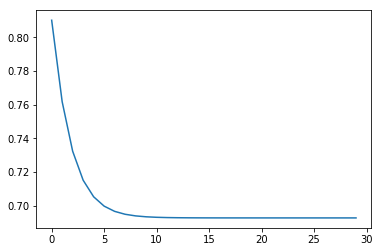

In [1375]:
plt.plot(range(len(cost)),cost)

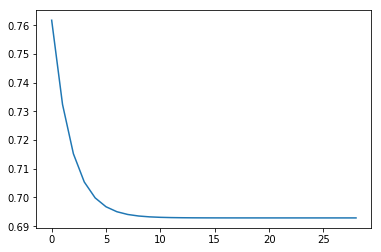

In [1376]:
plt.plot(range(len(cost[1:])),cost[1:])